In [1]:
import pandas as pd
import re

# Vytvořením kopusu

In [2]:
arciles = pd.read_pickle('idnes-covid.dataframe.pkl')
arciles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   pid          21 non-null     object        
 1   timestamp    21 non-null     datetime64[ns]
 2   title        21 non-null     object        
 3   description  21 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 800.0+ bytes


In [13]:
from string import punctuation

def clean(text):
    text = text.lower()
    text = re.sub('[%s]' % re.escape(punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [16]:
arciles["clean"] = (arciles["title"] + arciles["description"]).apply(clean)

In [17]:
arciles

pid                  timestamp  \
0   1927b8a02b3011ebb1110cc47ab5f122 2020-11-27 14:15:19.177719   
1   717d883030a911eb9d74ac1f6b220ee8 2020-11-27 14:15:19.187797   
2   1b0f8e76309a11ebb408ac1f6b220ee8 2020-11-27 14:15:19.202503   
3   bb226c162ff611ebb408ac1f6b220ee8 2020-11-27 14:15:19.215991   
4   fa8747082f3511ebb408ac1f6b220ee8 2020-11-27 14:15:19.228598   
5   8b93f6662f3011eb9c800cc47ab5f122 2020-11-27 14:15:19.240603   
6   a5af20dc2f1411ebb1110cc47ab5f122 2020-11-27 14:15:19.251072   
7   78d393b62e4e11eba25cac1f6b220ee8 2020-11-27 14:15:19.263841   
8   688e8dc02e3611ebb408ac1f6b220ee8 2020-11-27 14:15:19.276017   
9   e8275b5a2e5111ebb0f60cc47ab5f122 2020-11-27 14:15:19.285480   
10  efe8232e0d2711eba6f6ac1f6b220ee8 2020-11-27 14:15:19.296478   
11  88526ad82e6211ebb1110cc47ab5f122 2020-11-27 14:15:19.304525   
12  04179d6e2e4f11ebb408ac1f6b220ee8 2020-11-27 14:15:19.314354   
13  482eb20e2d9011eb842f0cc47ab5f122 2020-11-27 14:15:19.324363   
14  3effb1142b3e11eb8b230cc47ab5f122 2020-11-27 14:15:19.334021   
15  a1d5b2782d6b11eba7deac1f6b220ee8 2020-11-27 14:15:19.345855   
16  3f386c44297b11ebb408ac1f6b220ee8 2020-11-27 14:15:19.351830   
17  7404e81e2da711eb80e60cc47ab5f122 2020-11-27 14:15:19.360184   
18  75226e1030a911eba6f6ac1f6b220ee8 2020-11-27 14:18:20.732078   
19  c435e2ae2fdf11ebb115ac1f6b220ee8 2020-11-27 14:18:20.745270   
20  f5e6163230c211eb9c800cc47ab5f122 2020-11-27 15:22:16.017610   

                                                title  \
0   Blatný: Situace je nestabilní, bez dobrého skó...   
1   Během svátků žádné lyžování. Italská vláda trv...   
2   Průzkum: Většina hospod otevře okamžitě, kdy j...   
3   Blatný: Čekali jsme, že bude líp. Další rozvol...   
4   Koronavirus mělo už půl milionu Čechů. Na jak ...   
5   Nový žebříček zemí podle toho, jak se vyrovnáv...   
6   Jak smrtící je epidemie v Česku? V říjnu umíra...   
7   Česko se chystá na očkování. Jak se vakcína do...   
8   Vědkyně stopuje stovky mutací koronaviru. Odha...   
9   Prázdné hotely se plní běženci. Kanárské ostro...   
10  Opatření přehledně: Déle venku i v obchodech, ...   
11  V oborech navázaných na turisty hrozí zánik 20...   
12  Většina Čechů podporuje podniky nebo daruje pe...   
13  Pracují 18 hodin denně. Severokorejky vyrábějí...   
14  Děsuplný Flegr a zlehčující Šmucler. Debatu o ...   
15  Biden vybírá vládu, bude v ní "Toníček" se zku...   
16  Do škol se vrací prvňáci, vir se mezitím šíří ...   
17  Z Prymuly se stane poradce Andreje Babiše. Pre...   
18  Proč vláda váhá s uvolněním opatření? Bez Prah...   
19  Pandemie pohnula se školstvím, žáci ale mají d...   
20  Dánsko asi vykope a spálí miliony špatně zakop...   

                                          description  \
0   Události kolem pandemie v Česku i ve světě sle...   
1   Regionální představitelé italskou vládu vyzval...   
2   Hospodští už se na restart podnikání připravuj...   
3   Ministr zdravotnictví Jan Blatný v rozhovoru p...   
4   Posledních sto tisíc prokázaných onemocnění si...   
5   Na konci žebříčku agentury Bloomberg je ještě ...   
6   Mezi 12. a 18. říjnem letos zemřelo v Česku 28...   
7   Jako první vakcínu obdrží rizikové skupiny sen...   
8   Emma Hodcroftová sleduje genetickou informaci ...   
9   Letos připlulo z Afriky na Kanárské ostrovy de...   
10  Aktuálně.cz přináší přehled aktuálních zákazů ...   
11  Naopak lépe z hlediska cestovního ruchu jsou n...   
12  V době koronavirové krize také lidé podporoval...   
13  Ochranné pomůcky proti koronaviru se dostaly d...   
14  Vláda by například mohla oznámit, že na lidi, ...   
15  Trump odmítá uznat porážku ve volbách. Nově zv...   
16  Uvalení karantény na školku není ničím výjimeč...   
17  Bude mít smlouvu jako ostatní poradci, řekl na...   
18  Skóre PES sice již pět dní odpovídá třetímu st...   
19  Pandemie probudila české školství, změnila naš...   
20  Dánská vláda asi nařídí vykopat miliony mršin ...   

                                                

In [19]:
import json

with open("stop_worlds.json") as swf:
    stop_word = set(json.load(swf)["words"])
    
list(stop_word)[:10]

['vůbec',
 'aby',
 'ono',
 'nas',
 'smí',
 'kvůli',
 'pro',
 'může',
 'jestliže',
 'pres']

In [20]:
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer

In [21]:
cv = CountVectorizer(stop_words=stop_word)
data = cv.fit_transform(arciles["clean"])
data

/opt/conda/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['chut', 'ted'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


<21x369 sparse matrix of type '<class 'numpy.int64'>'
	with 398 stored elements in Compressed Sparse Row format>

In [25]:
dtm = pd.DataFrame(
    data=data.toarray(),
    index=arciles["title"],
    columns=cv.get_feature_names()
    )
dtm

afriky  afrikyletos  \
title                                                                     
Blatný: Situace je nestabilní, bez dobrého skór...       0            0   
Během svátků žádné lyžování. Italská vláda trvá...       0            0   
Průzkum: Většina hospod otevře okamžitě, kdy ji...       0            0   
Blatný: Čekali jsme, že bude líp. Další rozvolň...       0            0   
Koronavirus mělo už půl milionu Čechů. Na jak d...       0            0   
Nový žebříček zemí podle toho, jak se vyrovnáva...       0            0   
Jak smrtící je epidemie v Česku? V říjnu umíral...       0            0   
Česko se chystá na očkování. Jak se vakcína dos...       0            0   
Vědkyně stopuje stovky mutací koronaviru. Odhal...       0            0   
Prázdné hotely se plní běženci. Kanárské ostrov...       1            1   
Opatření přehledně: Déle venku i v obchodech, o...       0            0   
V oborech navázaných na turisty hrozí zánik 200...       0            0   
Většina Čechů podporuje podniky nebo daruje pen...       0            0   
Pracují 18 hodin denně. Severokorejky vyrábějí ...       0            0   
Děsuplný Flegr a zlehčující Šmucler. Debatu o c...       0            0   
Biden vybírá vládu, bude v ní "Toníček" se zkuš...       0            0   
Do škol se vrací prvňáci, vir se mezitím šíří v...       0            0   
Z Prymuly se stane poradce Andreje Babiše. Prem...       0            0   
Proč vláda váhá s uvolněním opatření? Bez Prahy...       0            0   
Pandemie pohnula se školstvím, žáci ale mají de...       0            0   
Dánsko asi vykope a spálí miliony špatně zakopa...       0            0   

                                                    agentury  aktuálních  \
title                                                                      
Blatný: Situace je nestabilní, bez dobrého skór...         0           0   
Během svátků žádné lyžování. Italská vláda trvá...         0           0   
Průzkum: Většina hospod otevře okamžitě, kdy ji...         0           0   
Blatný: Čekali jsme, že bude líp. Další rozvolň...         0           0   
Koronavirus mělo už půl milionu Čechů. Na jak d...         0           0   
Nový žebříček zemí podle toho, jak se vyrovnáva...         1           0   
Jak smrtící je epidemie v Česku? V říjnu umíral...         0           0   
Česko se chystá na očkování. Jak se vakcína dos...         0           0   
Vědkyně stopuje stovky mutací koronaviru. Odhal...         0           0   
Prázdné hotely se plní běženci. Kanárské ostrov...         0           0   
Opatření přehledně: Déle venku i v obchodech, o...         0           1   
V oborech navázaných na turisty hrozí zánik 200...         1           0   
Většina Čechů podporuje podniky nebo daruje pen...         0           0   
Pracují 18 hodin denně. Severokorejky vyrábějí ...         0           0   
Děsuplný Flegr a zlehčující Šmucler. Debatu o c...         0           0   
Biden vybírá vládu, bude v ní "Toníček" se zkuš...         0           0   
Do škol se vrací prvňáci, vir se mezitím šíří v...         0           0   
Z Prymuly se stane poradce Andreje Babiše. Prem...         0           0   
Proč vláda váhá s uvolněním opatření? Bez Prahy...         0           0   
Pandemie pohnula se školstvím, žáci ale mají de...         0           0   
Dánsko asi vykope a spálí miliony špatně zakopa...         0           0   

                                                    aktuálněcz  andreje  \
title                                                                     
Blatný: Situace je nestabilní, bez dobrého skór...           0        0   
Během svátků žádné lyžování. Italská vláda trvá...           0        0   
Průzkum: Většina hospod otevře okamžitě, kdy ji...           0        0   
Blatný: Čekali jsme, že bude líp. Další rozvolň...           1        0   
Koronavirus mělo už půl milionu Čechů. Na jak d...           0        0   
Nový žebříček zemí podle toho, jak se vyrovnáva...  

In [26]:
dtm.to_pickle("artickle.dtm.pkl")

In [30]:
dtm.sum(axis=0).sort_values()

afriky        1
snáší         1
smrtící       1
smlouvu       1
sledujeme     1
             ..
česku         3
například     3
koronaviru    3
česko         4
vláda         5
Length: 369, dtype: int64

In [41]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [42]:
wc = WordCloud(stopwords=stop_word, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [43]:
arciles.loc[1,"clean"]

'během svátků žádné lyžování italská vláda trvá na uzavření zimních areálůregionální představitelé italskou vládu vyzvali aby uzavřela hranice pokud provoz v zimních střediscích zatím nepovolí'

(-0.5, 399.5, 199.5, -0.5)

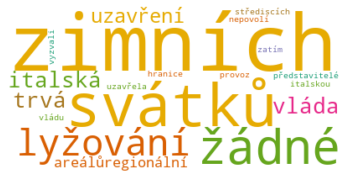

In [44]:
wc.generate(arciles.loc[1,"clean"])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")